# **Install & Import Dependencies**

In [1]:
# No need to install anything, just import
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# **Load Dataset (CIFAR-10)**

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names in CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **Visualize the Data**

<ipython-input-3-2840908156>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


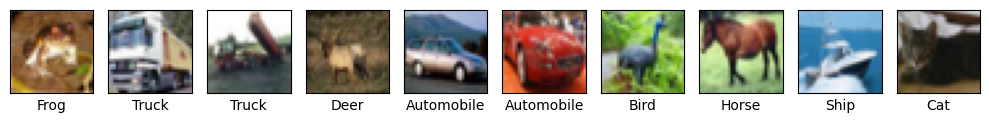

In [3]:
# Display 10 sample images
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.tight_layout()
plt.show()

# **Build CNN Model**

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile the Model**

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Train the Model**

In [6]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 58ms/step - accuracy: 0.3416 - loss: 1.7837 - val_accuracy: 0.5392 - val_loss: 1.2834
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.5675 - loss: 1.2145 - val_accuracy: 0.6183 - val_loss: 1.0749
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6310 - loss: 1.0514 - val_accuracy: 0.6241 - val_loss: 1.0644
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - accuracy: 0.6686 - loss: 0.9439 - val_accuracy: 0.6708 - val_loss: 0.9345
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6963 - loss: 0.8623 - val_accuracy: 0.6889 - val_loss: 0.9042
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 55ms/step - accuracy: 0.7163 - loss: 0.8042 - val_accuracy: 0.7020 - val_loss: 0.8744
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 57ms/step - accuracy: 0.7354 - loss: 0.7610 - val_accuracy: 0.6897 - val_loss: 0.9189
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.7

# **Evaluate the Model**

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")

313/313 - 6s - 20ms/step - accuracy: 0.7085 - loss: 0.8679

✅ Test Accuracy: 0.71


# **Plot Accuracy & Loss**

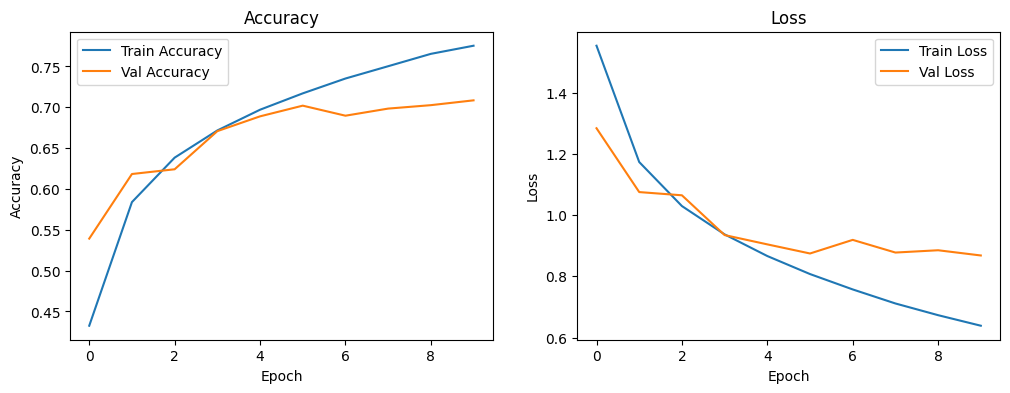

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.legend()

plt.show()

# **Predict on Test Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


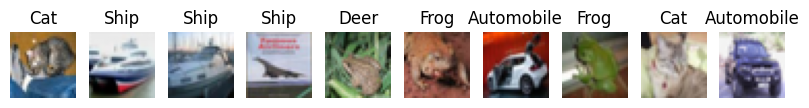

In [9]:
# Predict on first 10 test images
predictions = model.predict(x_test[:10])

# Show predictions
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()